In [15]:
import pandas as pd
import numpy as np 


In [16]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../notebooks')))

In [17]:
df_store=pd.read_csv("../data\store.csv")
df_train=pd.read_csv("../data\\train.csv")
df_test=pd.read_csv("../data\\test.csv")




C:\Users\ende\AppData\Local\Temp\ipykernel_10732\2869953929.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv("../data\\train.csv")


In [18]:
dflist=[df_train,df_test,df_store]
for df in dflist:
    df.info()
    print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 62.1+ MB
(1017209, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 

In [19]:
# % of values missing in each column 
values_list = list() 
cols_list = list() 
for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())*100 
    cols_list.append(col) 
    values_list.append(pct_missing) 
    pct_missing_df = pd.DataFrame() 
    pct_missing_df['col'] = cols_list 
    pct_missing_df['pct_missing'] = values_list

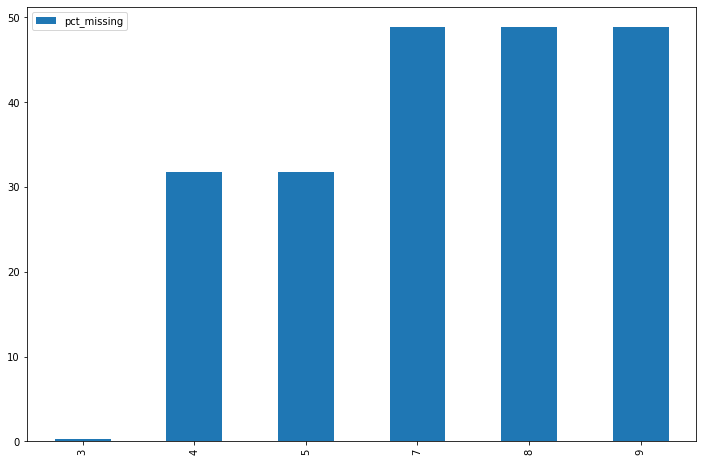

In [20]:
from matplotlib import pyplot as plt
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()

In [21]:
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)
df_store.dropna(inplace=True)

In [22]:
for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())



0
0
0


In [23]:
def to_int(x):
    return int(x)
# use function to convert floats to int

df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].apply(to_int)
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].apply(to_int)
df_store['Promo2SinceWeek'] = df_store['Promo2SinceWeek'].apply(to_int)
df_store['Promo2SinceYear'] = df_store['Promo2SinceYear'].apply(to_int)
df_test['Open'] = df_test['Open'].apply(to_int)



df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [24]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [25]:
df_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"


In [26]:
df_store['date']=df_store['CompetitionOpenSinceYear'].astype('str') + '-' + df_store['CompetitionOpenSinceMonth'].astype(str)

In [27]:
df_store['date'] = pd.to_datetime(df_store['date'])

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta
for year in df_store['Promo2SinceYear']:
    for week in df_store['Promo2SinceWeek']:
        date = datetime.date(year, 1, 1) + relativedelta(weeks=+week)
    df_store['promo_date']=date
       






        




In [28]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,date
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2007-11-01
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2006-12-01
10,11,a,c,960.0,11,2011,1,1,2012,"Jan,Apr,Jul,Oct",2011-11-01
13,14,a,a,1300.0,3,2014,1,40,2011,"Jan,Apr,Jul,Oct",2014-03-01
14,15,d,c,4110.0,3,2010,1,14,2011,"Jan,Apr,Jul,Oct",2010-03-01
